In [1]:
import scipy as scipy
from scipy import stats
from scipy.stats import norm
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize
from scipy.optimize import root
from scipy.integrate import quad
from matplotlib import pyplot as plt
from scipy.interpolate import CubicSpline

FOC wrt $x_1^h$:


$-(e_0^h-x_1^hp_1-x_2^hp_2)^{-\gamma}p_1+0.25 \sum_{S=1}^4(e^h(s)+x_1^hA_1(s)+x_2^h(s))^{-\gamma}A_1(s)=0$

FOC wrt $x_2^h$:


$-(e_0^h-x_1^hp_1-x_2^hp_2)^{-\gamma}p_2+0.25 \sum_{S=1}^4(e^h(s)+x_1^hA_1(s)+x_2^h(s))^{-\gamma}A_2(s)=0$\

Market clearing:

$x_1^1+x_1^2=0$

$x_2^1+x_2^2=0$

In [2]:
#set gamma
gamma=2
#Payoffs from assets:
A1=np.array([1,1,1,1])
A2=np.array([1,1,1.5,1.5])
#Endowments:
e0h1=1
e0h2=1
eh1=np.array([1,2,1,2])
eh2=np.array([3,1,3,1])

In [3]:
def fun(x):
    #Parameters we need to solve for: 
    #x1h1 x1h2 x2h1 x2h2
    #System of Equations: 
    #Household 1
    #FOC wrt x1h
    #x=[x1h1, x2h1,x1h2, x2h2,p1,p2]
    x1h1=x[0]
    x2h1=x[1]
    x1h2=x[2]
    x2h2=x[3]
    p1=x[4]
    p2=x[5]
    return \
     [0.25*(eh1[0]+x1h1*A1[0]+x2h1*A2[0])**(-gamma)*A1[0]+ #s0
     0.25*(eh1[1]+x1h1*A1[1]+x2h1*A2[1])**(-gamma)*A1[1]+ #s1
     0.25*(eh1[2]+x1h1*A1[2]+x2h1*A2[2])**(-gamma)*A1[2]+ #s2
     0.25*(eh1[3]+x1h1*A1[3]+x2h1*A2[3])**(-gamma)*A1[3]-  
     (e0h1-x1h1*p1-x2h1*p2)**(-gamma)*p1,
    #FOC wrt x2h
     0.25*(eh1[0]+x1h1*A1[0]+x2h1*A2[0])**(-gamma)*A2[0]+ #0
     0.25*(eh1[1]+x1h1*A1[1]+x2h1*A2[1])**(-gamma)*A2[1]+ #1
     0.25*(eh1[2]+x1h1*A1[2]+x2h1*A2[2])**(-gamma)*A2[2]+ #2
     0.25*(eh1[3]+x1h1*A1[3]+x2h1*A2[3])**(-gamma)*A2[3]- 
    (e0h1-x1h1*p1-x2h1*p2)**(-gamma)*p2,
    #Household 2
     0.25*(eh2[0]+x1h2*A1[0]+x2h2*A2[0])**(-gamma)*A1[0]+ #0
     0.25*(eh2[1]+x1h2*A1[1]+x2h2*A2[1])**(-gamma)*A1[1]+ #1
     0.25*(eh2[2]+x1h2*A1[2]+x2h2*A2[2])**(-gamma)*A1[2]+ #2
     0.25*(eh2[3]+x1h2*A1[3]+x2h2*A2[3])**(-gamma)*A1[3]-
    (e0h2-x1h2*p1-x2h2*p2)**(-gamma)*p1,
    #FOC wrt x2h
     0.25*(eh2[0]+x1h2*A1[0]+x2h2*A2[0])**(-gamma)*A2[0]+ #0
     0.25*(eh2[1]+x1h2*A1[1]+x2h2*A2[1])**(-gamma)*A2[1]+ #1
     0.25*(eh2[2]+x1h2*A1[2]+x2h2*A2[2])**(-gamma)*A2[2]+ #2
     0.25*(eh2[3]+x1h2*A1[3]+x2h2*A2[3])**(-gamma)*A2[3]- 
    (e0h2-x1h2*p1-x2h2*p2)**(-gamma)*p2,
    #Market clearing: 
    x1h1+x1h2,
    x2h1+x2h2]

In [4]:
sol=scipy.optimize.root(fun, [0.5,0.5,0.5, 0.5,0.5,0.5])
print(sol.x)

[ 1.95406656e-02 -1.58606804e-12 -1.95406656e-02  1.58606804e-12
  5.89777656e-01  7.37222070e-01]


In [5]:
gamma=4
sol=scipy.optimize.root(fun, [0.5,0.5,0.5, 0.5,0.5,0.5])
print(sol.x)

[ 4.02982343e-03  1.59618428e-10 -4.02982343e-03 -1.59618428e-10
  5.18661303e-01  6.48326628e-01]


In [6]:
gamma=8
sol=scipy.optimize.root(fun, [0.5,0.5,0.5, 0.5,0.5,0.5])
print(sol.x)

[ 1.56094144e-04  2.42864169e-12 -1.56094144e-04 -2.42864169e-12
  5.01014401e-01  6.26268001e-01]


In [7]:
gamma=166
sol=scipy.optimize.root(fun, [0.5,0.5,0.5, 0.5,0.5,0.5])
print(sol.x)

[ 392.77467319 -392.85218208 -392.77603894  392.8508168     0.89221453
    0.89185927]


If risk aversion is low, then there's basically no trade.

# Ramsey 1

In [2]:
#Initialize the problem:
beta=0.9
pi=0.5
sgrid=[1,2]
tolForFixedPoint=0.001
max_iterations=500

In [3]:
def objectivefun(EV1,K,K1,S):
    if S==1:
        c=0.9*K**0.3+0.3*K-K1
    else:
        c=1.1*K**0.3+0.9*K-K1
    value= np.zeros_like(c)
    value[c<=0]=-1000000
    value[c>0]=np.log(c[c>0])+beta*EV1[c>0] 
    return value

In [4]:
def V(grid_size):    
    kgrid=np.linspace(0.001,1,grid_size)
    EV1  = np.zeros(len(kgrid))   
    diff=1
    ixiter=0
    V=np.empty([len(kgrid),len(kgrid)])
    policy  = np.empty([len(kgrid),2])
    
    K1=np.linspace(0.001,1,len(kgrid))
    
    for ixiter  in range(max_iterations): 
        EV = np.zeros(len(kgrid))
        for ii, K in enumerate(kgrid): 
            #K=kgrid[ki]
            for jj, S in enumerate(sgrid): 
                #S=sgrid[sj]
                
                Vvalue=objectivefun(EV1,K,K1,S)

                optval=np.amax(Vvalue)
                policy[ii,jj]=kgrid[np.argmax(Vvalue)]
                V[ii,jj]=optval
                
            EV[ii]=pi* V[ii,0]+pi* V[ii,1]

        diff=np.amax(abs(EV1 - EV))

        EV1=np.copy(EV)
        if diff < tolForFixedPoint:
            break
    print(ixiter)
    return policy, V


In [5]:
grid_size=500
policy, Val  =V(grid_size)
kgrid=np.linspace(0.001,10,grid_size)

61


Text(0.5, 1.0, 'Policy function')

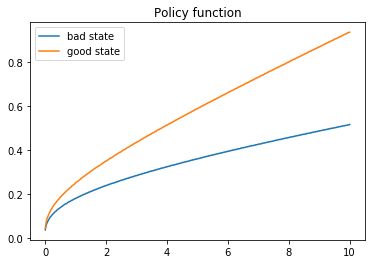

In [6]:
plt.plot(kgrid, policy[:,0], label="bad state")
plt.plot(kgrid, policy[:,1], label="good state")
plt.legend(loc="upper left")
plt.title("Policy function")

Text(0.5, 1.0, 'Value function')

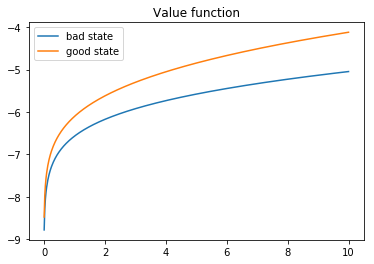

In [7]:
plt.plot(kgrid, Val[:,0], label="bad state")
plt.plot(kgrid, Val[:,1], label="good state")
plt.legend(loc="upper left")
plt.title("Value function")

# Problem 4

In [8]:
#Initialize the problem:
beta=0.9
pi=0.5
sgrid=[1,2]
tolForFixedPoint=0.001
max_iterations=200

In [9]:
def fk(K,S):
    if S==1:
        f=0.9*K**0.3+0.3*K
        fder=0.3*0.9*K**(-0.7)+0.3
    else:
        f=1.1*K**0.3+0.9*K
        fder=0.3*1.1*K**(-0.7)+0.9 
    return f,fder

In [10]:
def timeiter():    
    numpts=30
    mingrid=.2
    maxgrid=2
    kgrid=np.linspace(mingrid,maxgrid,numpts)
    diff=1
    ixiter=0
    V=np.empty([len(kgrid),len(kgrid)])
    policygrid=np.linspace(mingrid,maxgrid,numpts)
    policyguess1  = np.linspace(mingrid,maxgrid,numpts)
    policyguess2  = np.linspace(mingrid,maxgrid,numpts)
    Kprime=np.empty([len(kgrid),2])
    k1guess=mingrid*np.ones([len(kgrid),2])
    err=np.zeros([len(kgrid),2])
    for ixiter  in range(max_iterations): 
        EV = np.zeros(len(kgrid))
        for ii, K in enumerate(kgrid): 
            #K=kgrid[ki]
            for jj, S in enumerate(sgrid): 
                #S=sgrid[sj]
                def eulereq(K1):
                    f, fder=fk(K,S)
                    f1k1,f1der=fk(K1,1)
                    f2k1, f2der=fk(K1,2)
                    c=f-K1
                    cprime1=f1k1-np.interp(K1, policygrid, policyguess1)
                    cprime2=f2k1-np.interp(K1, policygrid, policyguess2)
                    ee=1/c-beta*pi*(f1der*(1/cprime1)+f2der*(1/cprime2)) 
                    ee[c<=0]=500
                    ee[cprime1<=0]=500
                    ee[cprime2<=0]=500
                    return ee
                root=scipy.optimize.root(eulereq, k1guess[ii,jj])
#                print(root.x)
                Kprime[ii,jj]=root.x
                err[ii,jj]=eulereq(root.x)
#                print(err[ii,jj])
#                 Vvalue=objectivefun(EV1,K,K1,S)
#                 optval=np.amax(Vvalue)
#                 policy[ii,jj]=kgrid[np.argmax(Vvalue)]
#                 V[ii,jj]=optval              
#            EV[ii]=pi* V[ii,0]+pi* V[ii,1]
        diff=np.amax(abs(err))
    #    print(err)
        policyguess1=Kprime[:,0]
        policyguess2=Kprime[:,1]
        k1guess[ii,jj]=Kprime[ii,jj]
        if diff < tolForFixedPoint:
            break
    print(ixiter)
    plt.plot(kgrid, policyguess1)
    plt.plot(kgrid, policyguess2)
    plt.plot(kgrid, kgrid)
    
    return policyguess1, policyguess2


7


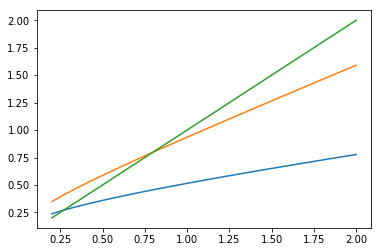

In [11]:
pg1,pg2=timeiter()

# Now change beta and the utility function


6


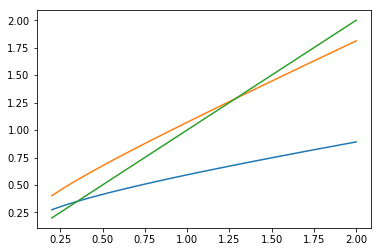

In [12]:
beta=0.999
pg1,pg2=timeiter()

Even with high beta it converges quickly

In [13]:
def timeiter():    
    numpts=30
    mingrid=.2
    maxgrid=2
    kgrid=np.linspace(mingrid,maxgrid,numpts)
    diff=1
    ixiter=0
    V=np.empty([len(kgrid),len(kgrid)])
    policygrid=np.linspace(mingrid,maxgrid,numpts)
    policyguess1  = np.linspace(mingrid,maxgrid,numpts)
    policyguess2  = np.linspace(mingrid,maxgrid,numpts)
    Kprime=np.empty([len(kgrid),2])
    k1guess=mingrid*np.ones([len(kgrid),2])
    err=np.zeros([len(kgrid),2])
    for ixiter  in range(max_iterations): 
        EV = np.zeros(len(kgrid))
        for ii, K in enumerate(kgrid): 
            #K=kgrid[ki]
            for jj, S in enumerate(sgrid): 
                #S=sgrid[sj]
                def eulereq(K1):
                    f, fder=fk(K,S)
                    f1k1,f1der=fk(K1,1)
                    f2k1, f2der=fk(K1,2)
                    c=f-K1
                    cprime1=f1k1-np.interp(K1, policygrid, policyguess1)
                    cprime2=f2k1-np.interp(K1, policygrid, policyguess2)
                    ee=(4*c**-5)-beta*pi*(f1der*(4*cprime1**-5)+f2der*(4*cprime2**-5)) 
                    ee[c<=0]=500
                    ee[cprime1<=0]=500
                    ee[cprime2<=0]=500
                    return ee
                root=scipy.optimize.root(eulereq, k1guess[ii,jj])
#                print(root.x)
                Kprime[ii,jj]=root.x
                err[ii,jj]=eulereq(root.x)
#                print(err[ii,jj])
#                 Vvalue=objectivefun(EV1,K,K1,S)
#                 optval=np.amax(Vvalue)
#                 policy[ii,jj]=kgrid[np.argmax(Vvalue)]
#                 V[ii,jj]=optval              
#            EV[ii]=pi* V[ii,0]+pi* V[ii,1]
        diff=np.amax(abs(err))
    #    print(err)
        policyguess1=Kprime[:,0]
        policyguess2=Kprime[:,1]
        k1guess[ii,jj]=Kprime[ii,jj]
        if diff < tolForFixedPoint:
            break
    print(ixiter)
    plt.plot(kgrid, policyguess1)
    plt.plot(kgrid, policyguess2)
    return policyguess1, policyguess2


21


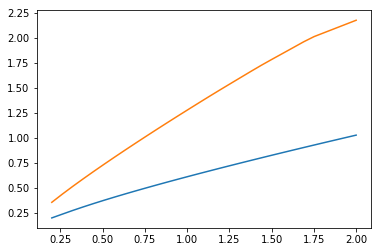

In [14]:
pg1,pg2=timeiter()

# Now use a polynomial of degree 5

In [15]:
#Initialize the problem:
beta=0.9
pi=0.5
sgrid=[1,2]
tolForFixedPoint=0.001
max_iterations=100

In [16]:
def timeiter_poly():    
    numpts=30
    mingrid=.2
    maxgrid=2
    kgrid=np.linspace(mingrid,maxgrid,numpts)
    diff=1
    ixiter=0
    V=np.empty([len(kgrid),len(kgrid)])
    policygrid=np.linspace(mingrid,maxgrid,numpts)
    policyguess1  = np.linspace(mingrid,maxgrid,numpts)
    policyguess2  = np.linspace(mingrid,maxgrid,numpts)
    Kprime=np.empty([len(kgrid),2])
    k1guess=mingrid*np.ones([len(kgrid),2])
    err=np.zeros([len(kgrid),2])
    for ixiter  in range(max_iterations): 
        EV = np.zeros(len(kgrid))
        for ii, K in enumerate(kgrid): 
            #K=kgrid[ki]
            for jj, S in enumerate(sgrid): 
                #S=sgrid[sj]
                def eulereq(K1):
                    f, fder=fk(K,S)
                    f1k1,f1der=fk(K1,1)
                    f2k1, f2der=fk(K1,2)
                    c=f-K1
                    coeffs1=np.polyfit(policygrid, policyguess1, 5)
                    poly1 = np.poly1d(coeffs1)
                    coeffs2=np.polyfit(policygrid, policyguess2, 5)
                    poly2 = np.poly1d(coeffs2)
                    cprime1=f1k1-poly1(K1)
                    cprime2=f2k1-poly2(K1)
                    ee=1/c-beta*pi*(f1der*(1/cprime1)+f2der*(1/cprime2)) 
                    ee[c<=0]=500
                    ee[cprime1<=0]=500
                    ee[cprime2<=0]=500
                    return ee
                root=scipy.optimize.root(eulereq, k1guess[ii,jj])
#                print(root.x)
                Kprime[ii,jj]=root.x
                err[ii,jj]=eulereq(root.x)
#                print(err[ii,jj])
#                 Vvalue=objectivefun(EV1,K,K1,S)
#                 optval=np.amax(Vvalue)
#                 policy[ii,jj]=kgrid[np.argmax(Vvalue)]
#                 V[ii,jj]=optval              
#            EV[ii]=pi* V[ii,0]+pi* V[ii,1]
        diff=np.amax(abs(err))
    #    print(err)
        policyguess1=Kprime[:,0]
        policyguess2=Kprime[:,1]
        k1guess[ii,jj]=Kprime[ii,jj]
        if diff < tolForFixedPoint:
            break
    print(ixiter)
    plt.plot(kgrid, policyguess1)
    plt.plot(kgrid, policyguess2)
    return policyguess1, policyguess2


6


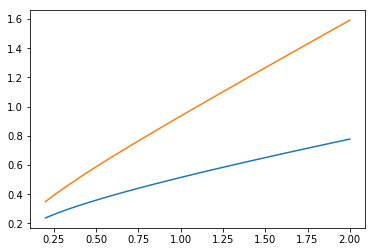

In [17]:
pg1,pg2=timeiter_poly()

# Now use cubic splines

In [18]:
#Initialize the problem:
beta=0.9
pi=0.5
sgrid=[1,2]
tolForFixedPoint=0.001
max_iterations=200

In [19]:
def timeiter_cubic():    
    numpts=30
    mingrid=.2
    maxgrid=2
    kgrid=np.linspace(mingrid,maxgrid,numpts)
    diff=1
    ixiter=0
    V=np.empty([len(kgrid),len(kgrid)])
    policygrid=np.linspace(mingrid,maxgrid,numpts)
    policyguess1  = np.linspace(mingrid,maxgrid,numpts)
    policyguess2  = np.linspace(mingrid,maxgrid,numpts)
    Kprime=np.empty([len(kgrid),2])
    k1guess=mingrid*np.ones([len(kgrid),2])
    err=np.zeros([len(kgrid),2])
    for ixiter  in range(max_iterations): 
        EV = np.zeros(len(kgrid))
        for ii, K in enumerate(kgrid): 
            #K=kgrid[ki]
            for jj, S in enumerate(sgrid): 
                #S=sgrid[sj]
                def eulereq(K1):
                    f, fder=fk(K,S)
                    f1k1,f1der=fk(K1,1)
                    f2k1, f2der=fk(K1,2)
                    c=f-K1
                    poly1=scipy.interpolate.CubicSpline(policygrid, policyguess1, extrapolate=bool)
                    poly2=scipy.interpolate.CubicSpline(policygrid, policyguess2, extrapolate=bool)
                    cprime1=f1k1-poly1(K1)
                    cprime2=f2k1-poly2(K1)
                    ee=1/c-beta*pi*(f1der*(1/cprime1)+f2der*(1/cprime2)) 
                    ee[c<=0]=500
                    ee[cprime1<=0]=500
                    ee[cprime2<=0]=500
                    return ee
                root=scipy.optimize.root(eulereq, k1guess[ii,jj])
#                print(root.x)
                Kprime[ii,jj]=root.x
                err[ii,jj]=eulereq(root.x)
#                print(err[ii,jj])
#                 Vvalue=objectivefun(EV1,K,K1,S)
#                 optval=np.amax(Vvalue)
#                 policy[ii,jj]=kgrid[np.argmax(Vvalue)]
#                 V[ii,jj]=optval              
#            EV[ii]=pi* V[ii,0]+pi* V[ii,1]
        diff=np.amax(abs(err))
    #    print(err)
        policyguess1=Kprime[:,0]
        policyguess2=Kprime[:,1]
        k1guess[ii,jj]=Kprime[ii,jj] 
        if diff < tolForFixedPoint:
            break
    print(ixiter)
    plt.plot(kgrid, policyguess1)
    plt.plot(kgrid, policyguess2)
    return policyguess1, policyguess2


7


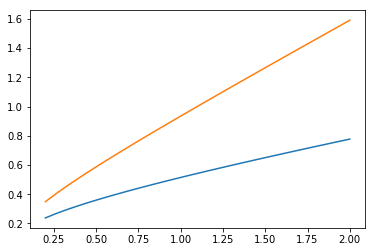

In [20]:
pg1,pg2=timeiter_cubic()

# Q 4 b

In [210]:
#Initialize the problem:
beta=0.9
pi=0.5
tolForFixedPoint=0.001
max_iterations=100

In [211]:
def fk(K,A1):
        f=np.exp(A1)*K**0.3+0.5*K
        fder=0.3*np.exp(A1)*K**(-0.7)+0.5
        return f,fder

In [212]:
def timeiter_prodshock():    
    numapts=10
    numpts=30
    mingrid=0.2
    maxgrid=10
    mina=-1
    maxa=1
    agrid=np.linspace(mina,maxa,numapts)
    kgrid=np.linspace(mingrid,maxgrid,numpts)
    diff=1
    ixiter=0
    V=np.empty([len(kgrid),len(kgrid)])
    policygrid,jk  = np.meshgrid(kgrid, agrid)
    policygrid=np.transpose(policygrid)
    policyguess1  = policygrid
    Kprime=np.empty([len(kgrid),len(agrid)])
    k1guess=mingrid*np.ones([len(kgrid),len(agrid)])
    err=np.zeros([len(kgrid),len(agrid)])
    for ixiter  in range(max_iterations): 
        EV = np.zeros(len(kgrid))
        for ii, K in enumerate(kgrid): 
            #K=kgrid[ki]
                for aa, A1 in enumerate(agrid):                
                    def eulereq(K1):
                        f, fder=fk(K,A1)
                        f1k1,f1der=fk(K1,A1)
                        prod = lambda eps: np.exp(0.9*A1+eps)
                        EZ, junk=scipy.integrate.quad(prod, mina, maxa)                   
                        c=f-K1
                        cprime1=f1k1-np.interp(K1, policygrid[:,aa], policyguess1[:,aa])
                        ee=1/c-beta*(f1der*(1/cprime1)) 
                        ee[c<=0]=500
                        ee[cprime1<=0]=500
                        return ee
                    root=scipy.optimize.root(eulereq, k1guess[ii,aa])
                    Kprime[ii,aa]=root.x
                    err[ii,aa]=eulereq(root.x)
#                print(err[ii,jj])
#                 Vvalue=objectivefun(EV1,K,K1,S)
#                 optval=np.amax(Vvalue)
#                 policy[ii,jj]=kgrid[np.argmax(Vvalue)]
#                 V[ii,jj]=optval              
#            EV[ii]=pi* V[ii,0]+pi* V[ii,1]
        diff=np.amax(abs(err))
    #    print(err)
        policyguess1=Kprime
        k1guess[ii,aa]=Kprime[ii,aa]
        if diff < tolForFixedPoint:
            break
    print(ixiter)
    plt.plot(kgrid, a[:,0], label="bad shock")
    plt.plot(kgrid, a[:,5], label="neutral")
    plt.plot(kgrid, a[:,9], label="good shock")
    plt.legend(loc="upper left")
    plt.title("Policy functions")
    return policyguess1


C:\Users\utabo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
C:\Users\utabo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\utabo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in less_equal
C:\Users\utabo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in less_equal


11


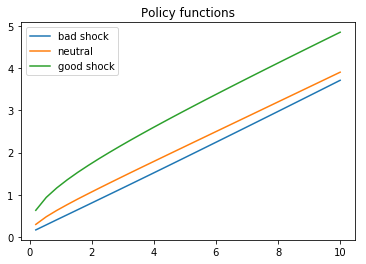

In [213]:
a=timeiter_prodshock()
 
